In [3]:
## Import libraries

import pandas as pd
import psycopg2
from sqlalchemy import create_engine,text
from dotenv import load_dotenv

In [4]:
## Load the data path

df=pd.read_csv(r"C:\Users\Len\Desktop\Order_Data_project\orders.csv")
df.head()

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


In [5]:
## LOADING THE DATABASE VARIABLES
import os
load_dotenv()

HOST= os.getenv("HOST")
USER= os.getenv("USER")
PASSWORD= os.getenv("PASSWORD")
PORT= os.getenv("PORT")
DATABASE= os.getenv("DATABASE")

In [6]:
connection_string= f"postgresql+psycopg2://{USER}:{PASSWORD}@{HOST}:{PORT}/{DATABASE}"
engine= create_engine(connection_string)

try:
    with engine.connect() as conn:
        print("connected successfully")

except Exception as e:
    print(f"connection failed {e}")

connected successfully


In [7]:
df.head(2)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3


In [8]:
## Structure of the database

df.shape

(9994, 16)

In [9]:
## Missing Values

df.isnull().sum()

Order Id            0
Order Date          0
Ship Mode           1
Segment             0
Country             0
City                0
State               0
Postal Code         0
Region              0
Category            0
Sub Category        0
Product Id          0
cost price          0
List Price          0
Quantity            0
Discount Percent    0
dtype: int64

In [10]:
# Replace missing value

df.fillna({"Ship Mode": "missing"}, inplace=True)

In [11]:
# Confirm No Missing values

df.isnull().sum()

Order Id            0
Order Date          0
Ship Mode           0
Segment             0
Country             0
City                0
State               0
Postal Code         0
Region              0
Category            0
Sub Category        0
Product Id          0
cost price          0
List Price          0
Quantity            0
Discount Percent    0
dtype: int64

In [12]:
# Data describe

df.describe()

,Order Id,Postal Code,cost price,List Price,Quantity,Discount Percent
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,201.189714,229.756854,3.789574,3.484090
std,2885.163629,32063.693350,537.743203,623.245839,2.225110,1.114211
min,1.000000,1040.000000,0.000000,0.000000,1.000000,2.000000
25%,2499.250000,23223.000000,20.000000,20.000000,2.000000,2.000000
50%,4997.500000,56430.500000,50.000000,50.000000,3.000000,3.000000
75%,7495.750000,90008.000000,180.000000,210.000000,5.000000,4.000000
max,9994.000000,99301.000000,18110.000000,22640.000000,14.000000,5.000000


In [13]:
# Data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order Id          9994 non-null   int64 
 1   Order Date        9994 non-null   object
 2   Ship Mode         9994 non-null   object
 3   Segment           9994 non-null   object
 4   Country           9994 non-null   object
 5   City              9994 non-null   object
 6   State             9994 non-null   object
 7   Postal Code       9994 non-null   int64 
 8   Region            9994 non-null   object
 9   Category          9994 non-null   object
 10  Sub Category      9994 non-null   object
 11  Product Id        9994 non-null   object
 12  cost price        9994 non-null   int64 
 13  List Price        9994 non-null   int64 
 14  Quantity          9994 non-null   int64 
 15  Discount Percent  9994 non-null   int64 
dtypes: int64(6), object(10)
memory usage: 1.2+ MB


In [14]:
## Load data 

df.to_sql('orders',engine, if_exists="replace", index=False)

994

In [15]:
df.columns

Index(['Order Id', 'Order Date', 'Ship Mode', 'Segment', 'Country', 'City',
       'State', 'Postal Code', 'Region', 'Category', 'Sub Category',
       'Product Id', 'cost price', 'List Price', 'Quantity',
       'Discount Percent'],
      dtype='object')

### Univariate Analysis
##### Univariate analysis: explores each variable in a data set, separately. (one variable at a time)

In [16]:
# Importing Data Visualization Libraries

import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df.head()

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


Text(0.5, 0, 'Quantity of Goods Bought')

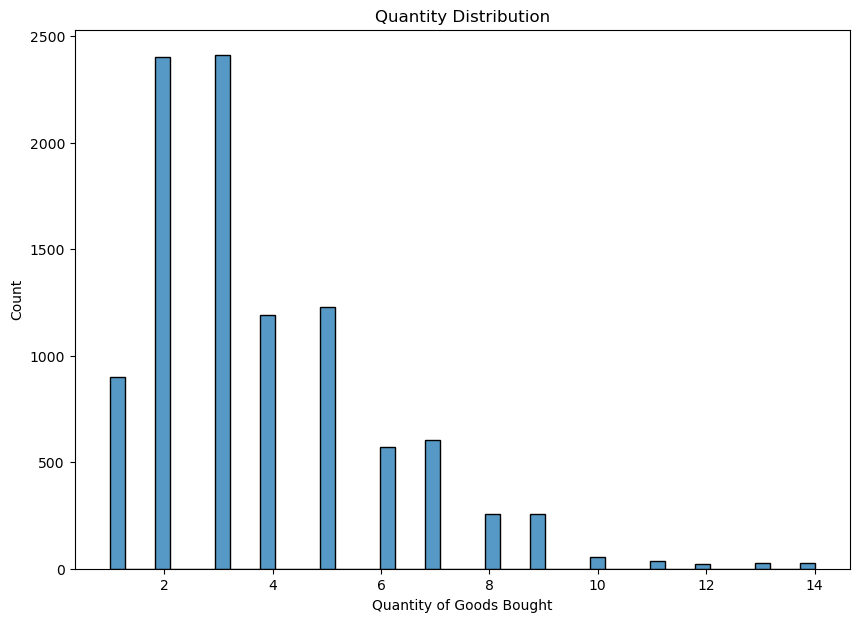

In [18]:
## Histogram (Quantity Column-Norm)

plt.figure(figsize=(10,7))
sns.histplot(data=df,x="Quantity")
plt.title("Quantity Distribution")
plt.xlabel("Quantity of Goods Bought")


In [19]:
df.columns

Index(['Order Id', 'Order Date', 'Ship Mode', 'Segment', 'Country', 'City',
       'State', 'Postal Code', 'Region', 'Category', 'Sub Category',
       'Product Id', 'cost price', 'List Price', 'Quantity',
       'Discount Percent'],
      dtype='object')

Text(0.5, 0, 'Quantity of Goods Bought')

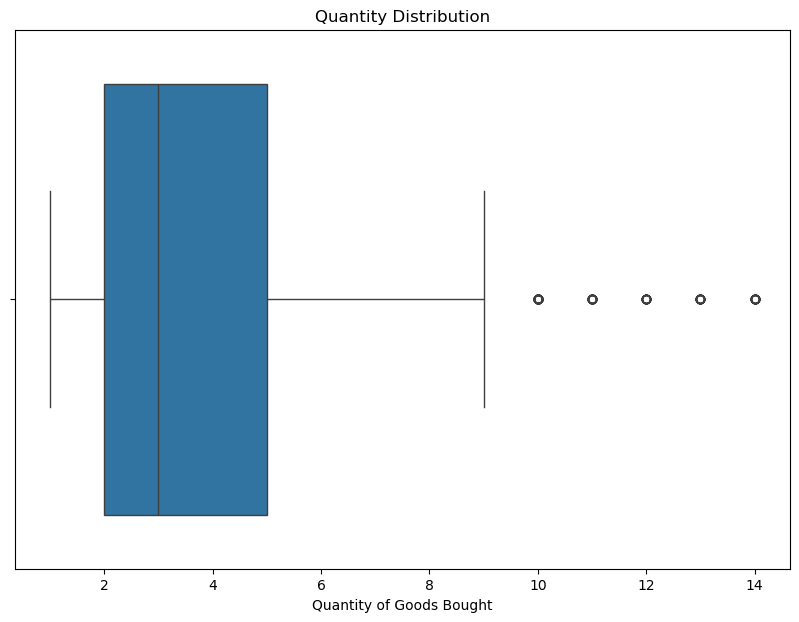

In [20]:
## Histogram (Quantity Column-Boxplot)

plt.figure(figsize=(10,7))
sns.boxplot(data=df,x='Quantity')
plt.title("Quantity Distribution")
plt.xlabel("Quantity of Goods Bought")


In [21]:
# Check for categorical variables.

print(df.dtypes)

print(df.columns)

Order Id             int64
Order Date          object
Ship Mode           object
Segment             object
Country             object
City                object
State               object
Postal Code          int64
Region              object
Category            object
Sub Category        object
Product Id          object
cost price           int64
List Price           int64
Quantity             int64
Discount Percent     int64
dtype: object
Index(['Order Id', 'Order Date', 'Ship Mode', 'Segment', 'Country', 'City',
       'State', 'Postal Code', 'Region', 'Category', 'Sub Category',
       'Product Id', 'cost price', 'List Price', 'Quantity',
       'Discount Percent'],
      dtype='object')


### Bivariative Analysis Visualizations : Bar plots, Count plots, Pie charts and Violin plots.

##### 1. Bar Plot

Number of States -  49


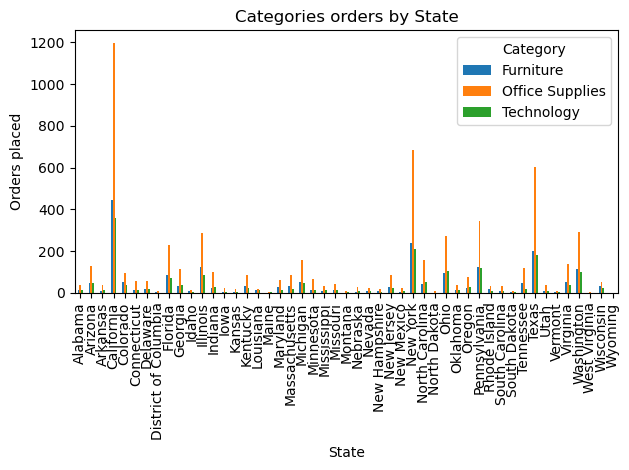

In [22]:
# Bar Plot - (State and Category)


total_num_of_states = df['State'].nunique()
print("Number of States - ", total_num_of_states)




state_category = pd.crosstab(df['State'], df['Category'])

state_category.plot(kind='bar')
plt.title("Categories orders by State")
plt.xlabel("State")
plt.ylabel("Orders placed")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


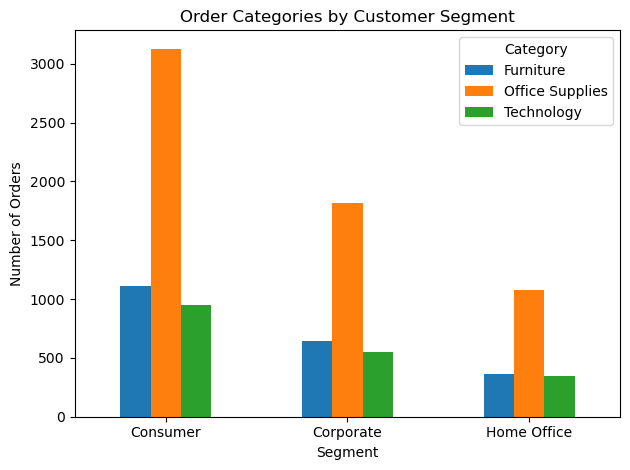

In [23]:
# Bar (Segment and Category)

segment_category = pd.crosstab(df["Segment"], df["Category"])

segment_category.plot(kind="bar")
plt.title("Order Categories by Customer Segment")
plt.xlabel("Segment")
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



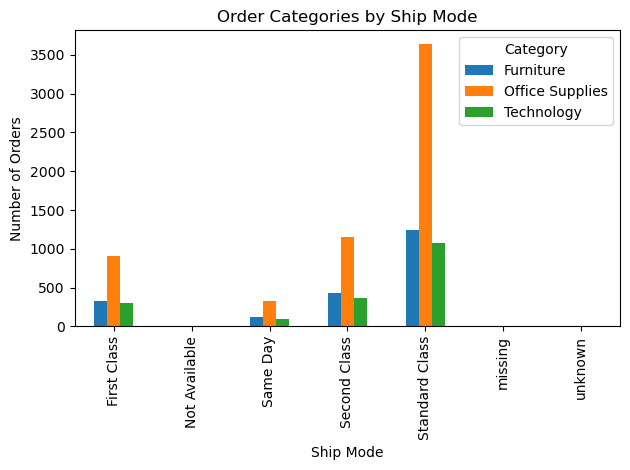

In [24]:
## Bar(Ship Mode and Category)

shipmode_category = pd.crosstab(df['Ship Mode'], df['Category'])

shipmode_category.plot(kind='bar')
plt.title('Order Categories by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


#### 2. Count Plot

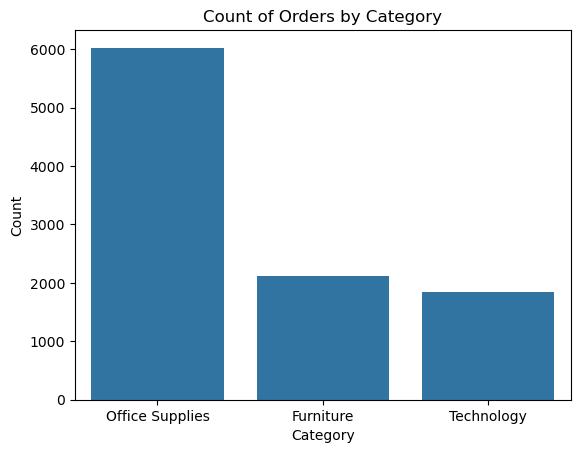

In [25]:
## Count Plots (Orders by Category)

sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index)
plt.title('Count of Orders by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()




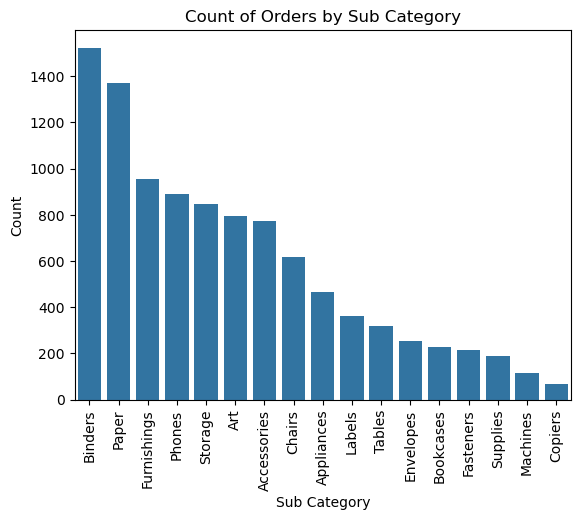

In [26]:
# Count Plot(Orders by Sub category)

sns.countplot(data=df, x='Sub Category', order=df['Sub Category'].value_counts().index)
plt.title('Count of Orders by Sub Category')
plt.xlabel('Sub Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()



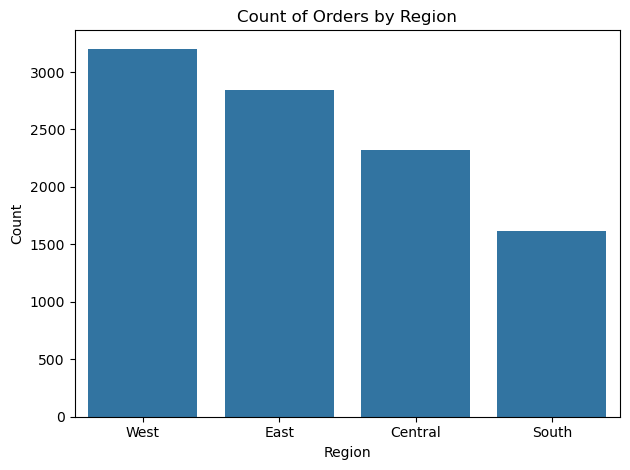

In [27]:
# Count plot (Orders by Region)

sns.countplot(data=df, x='Region', order=df['Region'].value_counts().index)
plt.title('Count of Orders by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


#### 3. Pie Chart

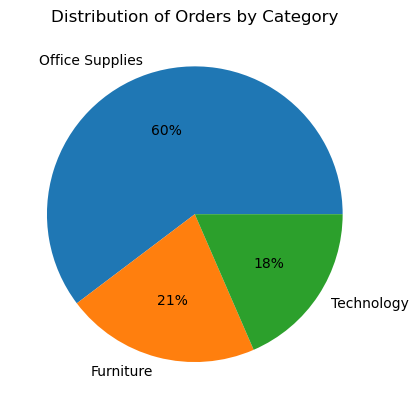

In [28]:
# Pie Chart (Orders and Category)

df['Category'].value_counts().plot.pie(autopct='%1.0f%%')
plt.title('Distribution of Orders by Category')
plt.ylabel('')
plt.show()


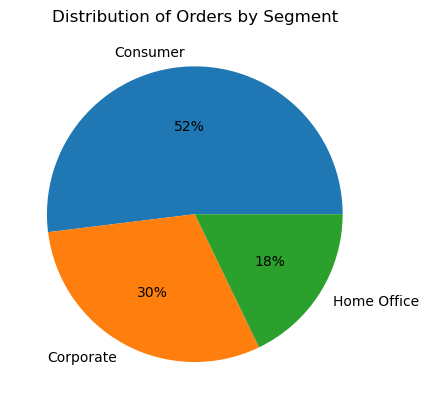

In [29]:
# Pie Chart (Orders and Segment)

df['Segment'].value_counts().plot.pie(autopct='%1.0f%%')
plt.title('Distribution of Orders by Segment')
plt.ylabel('')
plt.show()


#### 4. Violin Plot (Numeric and Categorical)
##### Segment and List Price

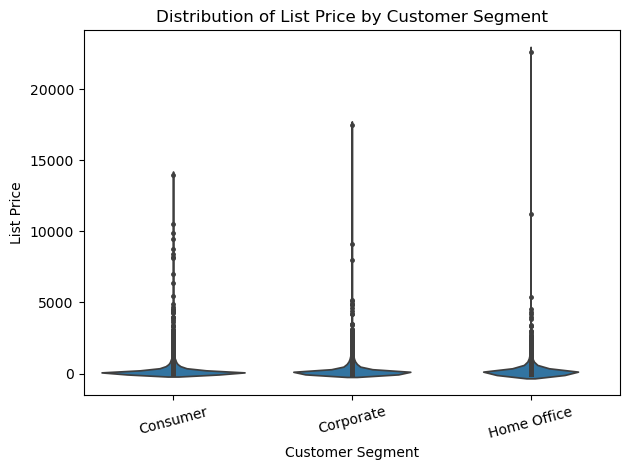

In [30]:
# Create the Violin plot

sns.violinplot(data=df, x='Segment', y='List Price', inner='point') #Nb(inner option:stick,point,box)
plt.title('Distribution of List Price by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('List Price')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


#### List price by Category

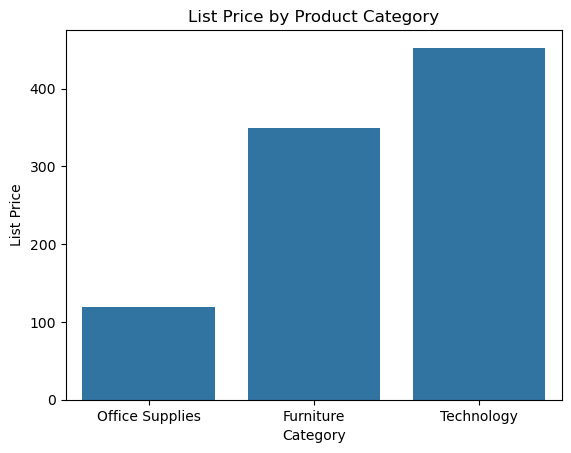

In [31]:
# Bar chart: Average List Price per Category

sns.barplot(data=df, x='Category', y='List Price', errorbar=None, order=df['Category'].value_counts().index)
plt.title('List Price by Product Category')
plt.xlabel('Category')
plt.ylabel('List Price')
plt.show()

#### 5. Scatter Plot - Numeric and Numeric
##### Profit and List Price 

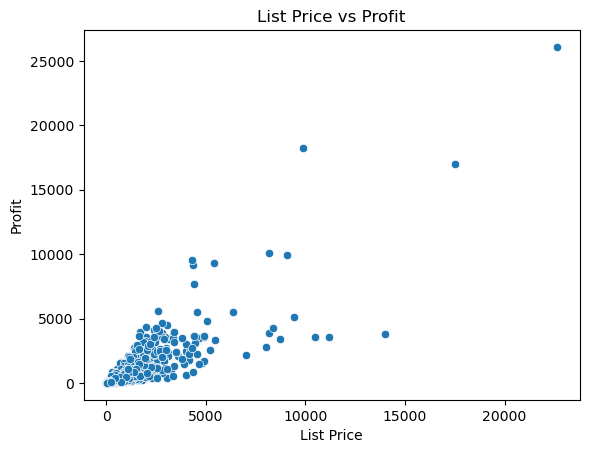

In [32]:
# Scatter Plot

# Define Profit

df['Profit'] = (df['List Price'] - df['cost price']) * df['Quantity'] * (1 - df['Discount Percent'] / 100)


sns.scatterplot(data=df, x='List Price', y='Profit')
plt.title('List Price vs Profit')
plt.xlabel('List Price')
plt.ylabel('Profit')
plt.show()


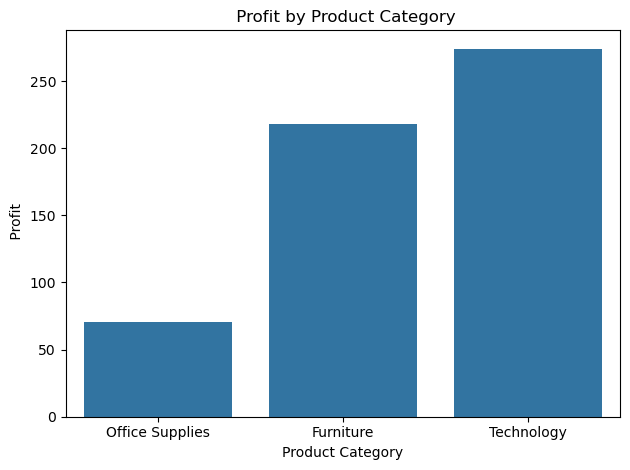

In [36]:
# Bar Plot - (Profit and Category)
sns.barplot(data=df, x='Category', y='Profit', errorbar=None, order=df['Category'].value_counts().index)
plt.title(' Profit by Product Category')
plt.xlabel('Product Category')
plt.ylabel(' Profit')
plt.tight_layout()
plt.show()